**Canadian Farming Farm Value Estimator and Crop Suggestion**

**1. Reading the Data**




In [665]:
import os, math
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mtl
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/erfunviva/data-science/main/Canadian_farming.csv')
df.head()



,year,province,crop,precipitation(mm),harvested area (acres),yield (tonnes/acres),production (tonnes),farm gate value ($)
0,1995,AB,corn,350.1,4940.0,5.51,27203.0,4115548.0
1,1996,AB,corn,482.1,5025.0,5.41,27208.0,4196498.0
2,1997,AB,corn,491.3,4897.5,5.46,26726.5,4201007.0
3,1998,AB,corn,489.1,4770.0,5.50,26245.0,4202678.0
4,1999,AB,corn,423.8,4900.0,2.97,14560.0,2374444.0


In [411]:
df_backup = df

**2. Finding missing Data**


First, let's find the missing values in df


In [412]:
#NaN values in each column
df.isna().sum()

year                        0
province                    0
crop                        0
precipitation(mm)         140
harvested area (acres)    116
yield (tonnes/acres)      118
production (tonnes)       113
farm gate value ($)       139
dtype: int64

There are 5 different crops, 10 provinces. Also, the number of years from 1995 to 2022 is 28 (28 years for each crop and each province). So we have 5*10*28= 1400 rows of data in total df. 140 missing values in precipitation column above shows that one province might have exactly no data as 140/5 = 28. 

Let's dig deeper... We will use the Missingno library to identify and visualize the missing data

<AxesSubplot:>

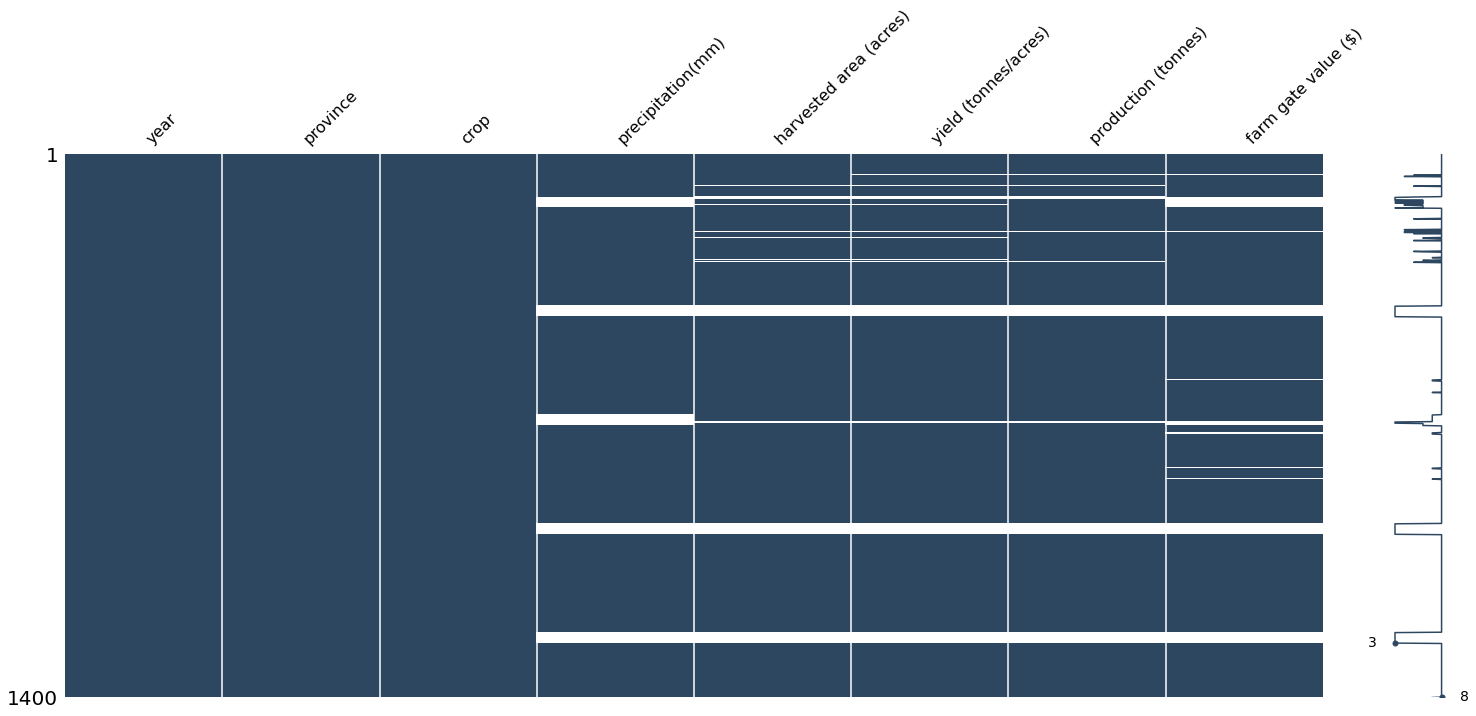

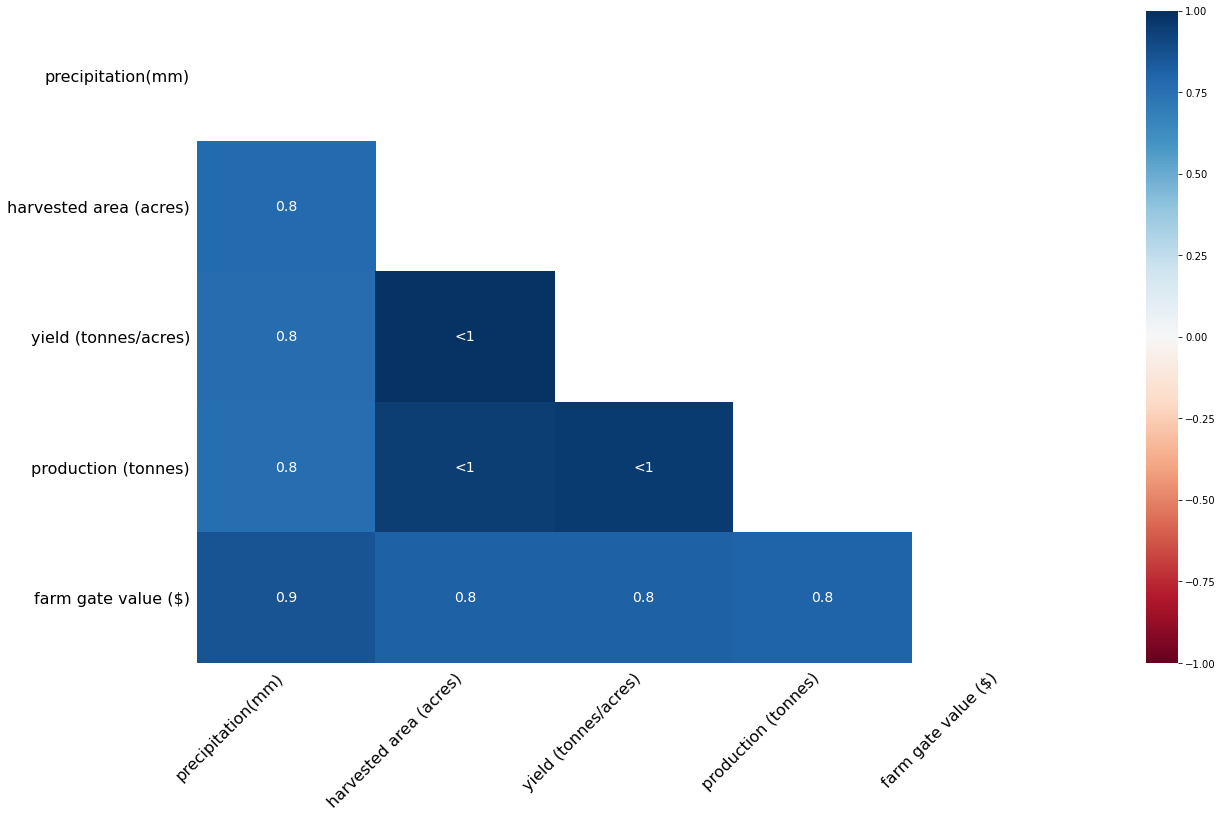

In [413]:
#Finding the missing values in the dataframe

import missingno as msno

msno.matrix(df,color=(0.18, 0.28, 0.38))
msno.heatmap(df)


The information above on the matrix shows that we have 5 major lines of NaN values in the dataset. Since there are 5 different crops, so when we have 5 sections of missing values it should be related to one of the provinces. Newfoundland had the least amount of farmlands data. 

In [414]:
df.loc[df.province=='NL'].isna().sum()

year                        0
province                    0
crop                        0
precipitation(mm)         140
harvested area (acres)    102
yield (tonnes/acres)      102
production (tonnes)        98
farm gate value ($)       122
dtype: int64

In [415]:
df.loc[df.province =='NL']

,year,province,crop,precipitation(mm),harvested area (acres),yield (tonnes/acres),production (tonnes),farm gate value ($)
112,1995,NL,corn,NaN,NaN,NaN,NaN,NaN
113,1996,NL,corn,NaN,NaN,NaN,NaN,NaN
114,1997,NL,corn,NaN,NaN,NaN,NaN,NaN
115,1998,NL,corn,NaN,NaN,NaN,NaN,NaN
116,1999,NL,corn,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1255,2018,NL,oat,NaN,NaN,NaN,NaN,NaN
1256,2019,NL,oat,NaN,NaN,NaN,NaN,NaN
1257,2020,NL,oat,NaN,NaN,NaN,NaN,NaN
1258,2021,NL,oat,NaN,NaN,NaN,NaN,NaN


NL province (Newfoundland and Labrador) has the least amount of data. The precipitation NaN count for NL is 140. ALso, NL has special weather and geological features and has the least chance of farmability. So, we will eliminate this province to make sure our model works correctly for all other provinces. 

**3. Data Cleaning**


In this part, we will drop NL data and fill other missing values 

In [416]:
df2 = df.drop((df[df.province=='NL']).index).reset_index(drop=True)

df2.head()

,year,province,crop,precipitation(mm),harvested area (acres),yield (tonnes/acres),production (tonnes),farm gate value ($)
0,1995,AB,corn,350.1,4940.0,5.51,27203.0,4115548.0
1,1996,AB,corn,482.1,5025.0,5.41,27208.0,4196498.0
2,1997,AB,corn,491.3,4897.5,5.46,26726.5,4201007.0
3,1998,AB,corn,489.1,4770.0,5.50,26245.0,4202678.0
4,1999,AB,corn,423.8,4900.0,2.97,14560.0,2374444.0


<AxesSubplot:>

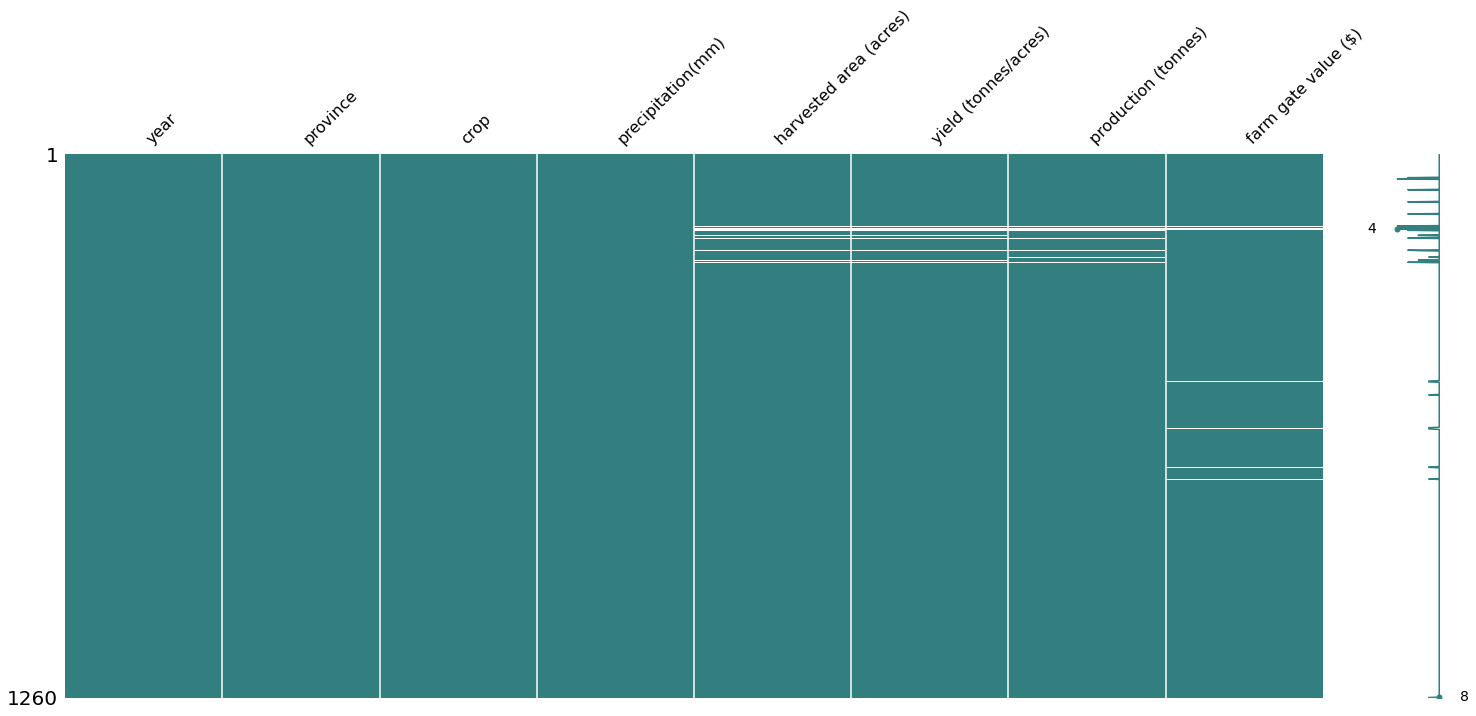

In [417]:
msno.matrix(df2,color=(0.2, 0.5, 0.5))

The 5 major white lines in the above matrix are gone after dropping NL from the df.

Let's make the column names easier to work with

In [418]:
df2.rename(columns={
    'precipitation(mm)':'precipitation',
    'harvested area (acres)':'harvested_area',
    'yield (tonnes/acres)':'yielded',
    'production (tonnes)':'production',
    'farm gate value ($)':'farm_value'
}, inplace=True)

df2.isna().sum()


year               0
province           0
crop               0
precipitation      0
harvested_area    14
yielded           16
production        15
farm_value        17
dtype: int64

In [419]:
df2[df2['harvested_area'].isna()]
df3 = df2.interpolate()
df3.isna().sum()


year              0
province          0
crop              0
precipitation     0
harvested_area    0
yielded           0
production        0
farm_value        0
dtype: int64

In [420]:
df3.isna().sum()


year              0
province          0
crop              0
precipitation     0
harvested_area    0
yielded           0
production        0
farm_value        0
dtype: int64

<AxesSubplot:>

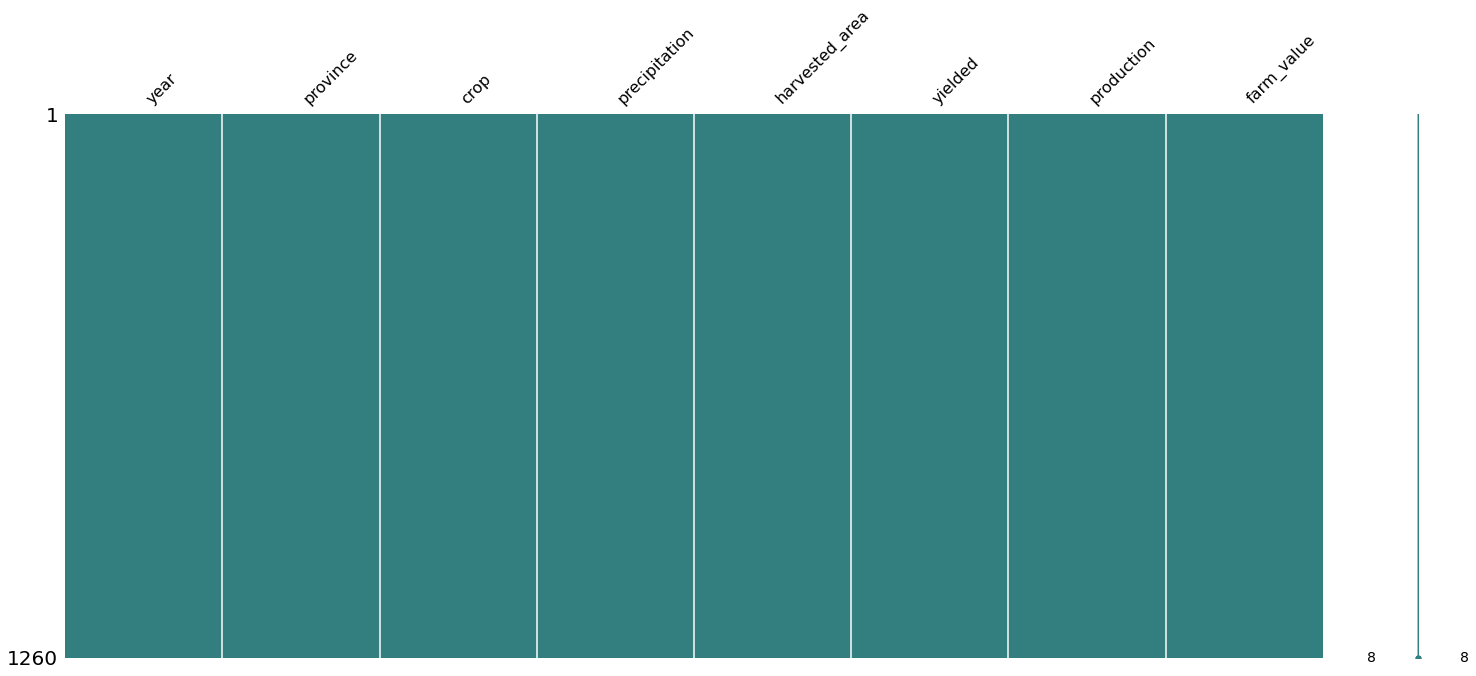

In [421]:
#final check for NaN values 
msno.matrix(df3,color=(0.2, 0.5, 0.5))

In [422]:
df3.isna().sum().sum()

0

In [423]:
df3.production.round(decimals=2)

df3.describe()

,year,precipitation,harvested_area,yielded,production,farm_value
count,1260.000000,1260.000000,1.260000e+03,1260.000000,1.260000e+03,1.260000e+03
mean,2008.500000,878.408333,8.026346e+05,1.475151,8.811427e+05,4.125022e+07
std,8.080955,395.603138,2.292358e+06,1.216445,2.429884e+06,6.706401e+07
min,1995.000000,159.700000,3.000000e+01,0.000000,1.800000e+01,0.000000e+00
25%,2001.750000,487.475000,7.000000e+03,0.890000,8.266250e+03,6.389582e+05
50%,2008.500000,937.000000,4.200000e+04,1.200000,2.974900e+04,4.553200e+06
75%,2015.250000,1210.775000,2.377250e+05,1.540000,2.046250e+05,5.239223e+07
max,2022.000000,1718.600000,1.795000e+07,7.870000,1.829830e+07,4.008220e+08


**3. Data Visualization**


first let's see the relation between every pair parameters in the dataset. 

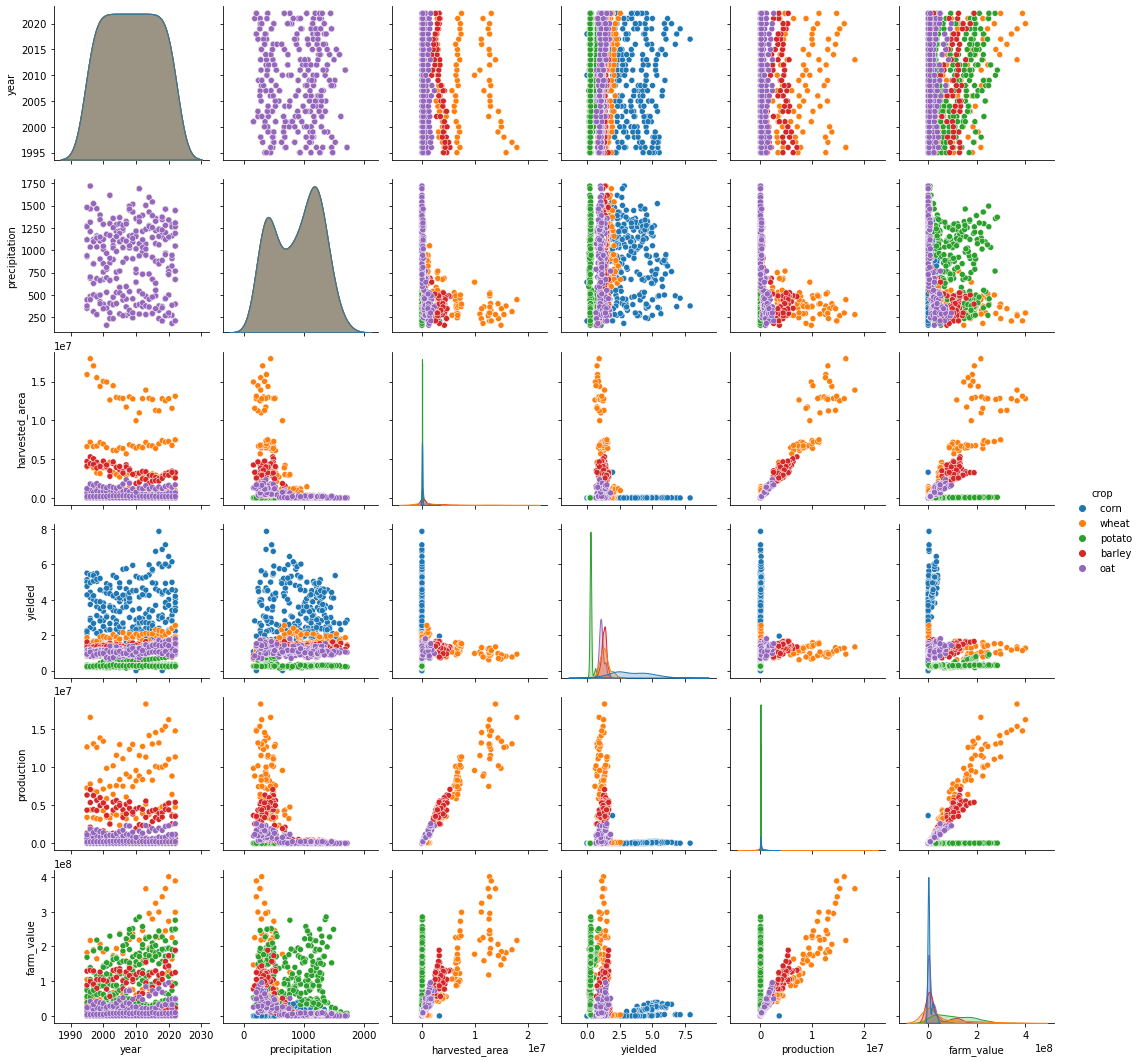

In [424]:
sn.pairplot(df3, hue='crop')

<AxesSubplot:xlabel='production (tonnes)', ylabel='crop'>

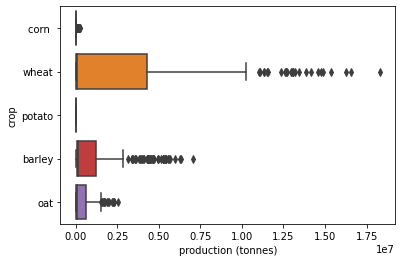

In [425]:
sn.boxplot(x='production (tonnes)',y='crop',data=df)

As assumed, Wheat has significantly the highest amount of production among all crops produced in Canada

In [426]:
import plotly.express as px

fig1 = px.bar(df3, x='crop',color='crop', y='production', title='Production for each crop')
fig1.show()

In [427]:
fig2 = px.area(df3, x='year',y='farm_value',color='crop', line_group="province", title='Total farm value for each crop from 1995 to 2022')
fig2.show()

In [428]:
#Pie chart s
df4 = df3.replace({
    'AB':'Alberta',
    'BC':'British Columbia',
    'MB':'Manitoba',
    'NB':'New Brunswick',
    'NS':'Nova Scotia',
    'ON':'Ontario',
    'PE':'Prince Edward Islands',
    'QC':'Quebec',
    'SK':'Saskatchewan'})

fig3 = px.pie(df4, values='production', names='province', color='province', title='Figure 3- Percentage of total production of all crops in each province')

fig3.show()


In [429]:
#Pie chart s
fig4 = px.sunburst(df3, path=['crop', 'province'], values='production',
                  color='production', hover_data=['province'],
                    title='Figure 4- Hierarchy of production of different crops in Canadian Provinces.')
fig4.show()


In [638]:
df3.head()

,year,province,crop,precipitation,harvested_area,production,farm_value
0,1995,0,1,350.1,4940.0,27203.0,4115548.0
1,1996,0,1,482.1,5025.0,27208.0,4196498.0
2,1997,0,1,491.3,4897.5,26726.5,4201007.0
3,1998,0,1,489.1,4770.0,26245.0,4202678.0
4,1999,0,1,423.8,4900.0,14560.0,2374444.0


<AxesSubplot:>

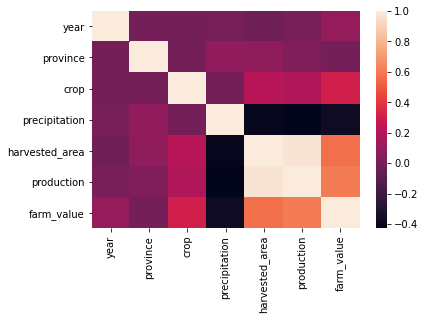

In [639]:
sn.heatmap(df3.corr())

We have to drop the "yielded" column because it has a collinear relation with harvested area and production. It depends on them. So to make sure we are using independent features for our X in the modelling part, this column is being dropped.

In [432]:
df3.drop('yielded', axis='columns',inplace=True)
dft = df3
df3.head(3)


,year,province,crop,precipitation,harvested_area,production,farm_value
0,1995,AB,corn,350.1,4940.0,27203.0,4115548.0
1,1996,AB,corn,482.1,5025.0,27208.0,4196498.0
2,1997,AB,corn,491.3,4897.5,26726.5,4201007.0


In [640]:
categorical_features = ['province','crop']
numeric_features = ['year','precipitation','harvested_area','production','farm_values']


**4. Data pre-processing**


In this part, we will prepare the data for ML modelling
(Data pre-processing) using SKLearn ColumnTransformer. So we will transform the categorical features (province and crop columns) to numeric values without any hiarchy.

In [641]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


ct = ColumnTransformer(
    [('hotencoder',OneHotEncoder(),categorical_features)],
    remainder='passthrough'
)

transformed = ct.fit_transform(df3)
transformed

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.9400000e+03,
        2.7203000e+04, 4.1155480e+06],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.0250000e+03,
        2.7208000e+04, 4.1964980e+06],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.8975000e+03,
        2.6726500e+04, 4.2010070e+06],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.6300000e+06,
        2.2964000e+06, 9.5837899e+07],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.3830000e+06,
        1.1525270e+06, 4.9036478e+07],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.6880000e+06,
        2.5671360e+06, 4.9036478e+07]])

let's remake the dataframe based on transformed columns

In [642]:
ct_columns = (
    ct.named_transformers_["hotencoder"].get_feature_names().tolist() + 
    numeric_features
)
ct_columns

ct_df = pd.DataFrame(transformed, columns = ct_columns)

ct_df.rename({
    'x0_AB':'AB',
    'x0_BC':'BC',
    'x0_MB':'MB',
    'x0_NB':'NB',
    'x0_NS':'NS',
    'x0_ON':'ON',
    'x0_PE':'PE',
    'x0_QC':'QC',
    'x0_SK':'SK',
    'x1_corn':'ccorn',
    'x1_wheat':'wheat',
    'x1_potato':'potato',
    'x1_barley':'barley',
    'x1_oat':'oat',
}, axis='columns',inplace=True)

ct_df.head()

,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x1_0,x1_1,x1_2,x1_3,x1_4,year,precipitation,harvested_area,production,farm_values
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1995.0,350.1,4940.0,27203.0,4115548.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1996.0,482.1,5025.0,27208.0,4196498.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1997.0,491.3,4897.5,26726.5,4201007.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1998.0,489.1,4770.0,26245.0,4202678.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1999.0,423.8,4900.0,14560.0,2374444.0


In [643]:
#Defining X and y for modelling

X = ct_df.drop(['farm_values'],axis='columns')
y = ct_df[['farm_values']]



**5. Machine Learning Modelling**




In [644]:

from sklearn.model_selection import train_test_split

In [655]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

linear_model = LinearRegression()
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [656]:
linear_model.fit(X_train,y_train)


LinearRegression()

In [659]:
linear_model.score(X_test,y_test)


0.7637957827103219

In [654]:
from sklearn.model_selection import cross_val_score 
score = cross_val_score(linear_model,X_test,y_test)
np.average(score)


0.7213793878707508

The linear model with a fair realistic score is now ready to predict the farm price for the farmer, in any desired year.

**Classification of Crops**

In this section we will go over classification models. There are two scenarios here; 

1. The farmer might want to know based on the precipitation, harvested_area, production, and perhaps their province, what would be the best crop to farm. For example, John from Alberta, knowing that he has a farm size of 24560 acres, with desired annual production of 120,000 metric tonnes, and yearly rainfall average of 200mm, what would be the recommended ideal crop to farm. 


2. In the second scenario the farmer wants to identify which province is ideal for farming their preferred crop.For instance, Ashley thinks that it is reasonable to grow barley because she thinks that it would be proftiable in 2028. She has heard from her friends that Canada offers beautiful barley farmlands. So she can now find out which province would be ideal for barley in the upcoming years for her.

Farm value is elminated from the features because it is a result of production and harvested_area.

**A) Classification for choosing the crops**

In [523]:
#Necessary modelling libs

from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier
from sklearn.svm import SVC #Support Vector Machine
from sklearn.naive_bayes import GaussianNB #Naive Bayes- Gaussian
from sklearn.naive_bayes import MultinomialNB #Naive Bayes- Multinomial



#Creating the Classifying objects

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()
nb = GaussianNB()
mn = MultinomialNB()

In [570]:
from sklearn.preprocessing import LabelEncoder
df4 = df3

le = LabelEncoder()
le.fit(df4.province)
df4.province = le.transform(df4.province)
df4.crop = le.fit_transform(df4.crop)

X = ct_df.drop(['barley','oat','wheat','potato','farm_values'],axis='columns')
y = df4.crop

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)



Our numerical data has a low normality, so it is essential to normalize the X_train and X_test data using MinMaxScaler.

In [571]:
#Feature scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [572]:
all_models = [dt,rf,lr,svm,nb,mn] #Putting all Classifiers into one list for easier cross validation and hypertuning.

In [573]:
for model in all_models:
    model.fit(X_train_scaled,y_train)
    score = cross_val_score(model,X_test_scaled,y_test)
    print(model,np.average(score))

DecisionTreeClassifier() 0.7487719298245614
RandomForestClassifier() 0.7806666666666666
LogisticRegression() 0.4657543859649123
SVC() 0.44459649122807016
GaussianNB() 0.550561403508772
MultinomialNB() 0.4155438596491228


It appears that DecisionTree and RandomForest are performing better here, let's dig deeper and try to tune the models.

In [574]:
from sklearn.model_selection import GridSearchCV

In [575]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params': {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    
    'random_forest': {
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10,50,100]
        }
    },
    
    'logistic_regression': {
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    } 
    
}

In [606]:
scores = []

for model_names, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_scaled, y_train)
    scores.append({
        'model':model_names,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })


In [607]:
hypertune = pd.DataFrame(scores,columns = ['model','best_score','best_params'])
hypertune

,model,best_score,best_params
0,svm,0.438816,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.880951,{'n_estimators': 50}
2,logistic_regression,0.373003,{'C': 10}
3,naive_bayes_gaussian,0.482993,{}
4,naive_bayes_multinomial,0.185978,{}
5,decision_tree,0.820840,{'criterion': 'entropy'}


**B) Classification for choosing the Province**

In [628]:
X = ct_df.drop(['AB','BC','MB','NB','NS','ON','PE','QC','SK','farm_values'],axis='columns')
y = df4.province

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)


In [629]:
#Feature scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [630]:
for model in all_models:
    model.fit(X_train_scaled,y_train)
    score = cross_val_score(model,X_test_scaled,y_test)
    print(model,np.average(score))

DecisionTreeClassifier() 0.757980198019802
RandomForestClassifier() 0.8393267326732674
LogisticRegression() 0.3196039603960396
SVC() 0.33144554455445546
GaussianNB() 0.47025742574257423
MultinomialNB() 0.16871287128712872


In [631]:
scores = []

for model_names, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_scaled, y_train)
    scores.append({
        'model':model_names,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
hypertune = pd.DataFrame(scores,columns = ['model','best_score','best_params'])
hypertune

,model,best_score,best_params
0,svm,0.447098,"{'C': 20, 'kernel': 'linear'}"
1,random_forest,0.895486,{'n_estimators': 100}
2,logistic_regression,0.392811,{'C': 10}
3,naive_bayes_gaussian,0.449695,{}
4,naive_bayes_multinomial,0.194493,{}
5,decision_tree,0.845234,{'criterion': 'entropy'}


RandomForest Classifier with n_estimators=100 seems to be promissing with the score of 89%

In [632]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

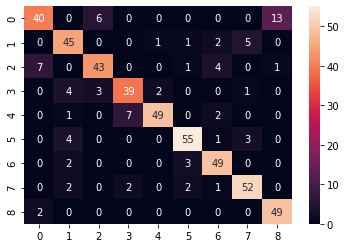

In [633]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_scaled, y_train)
cm = confusion_matrix(y_test,clf.predict(X_test_scaled))
sn.heatmap(cm,annot=True)